# Kernel Ridge para Predicción de Temperatura (_kernelridge)
Este notebook implementa Kernel Ridge Regression (con kernel RBF) para predecir temperatura, con todas las curvas y métricas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, cross_val_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cargar el dataset
dataset = pd.read_csv('../dataset/ML1_temperature.xlsx - Hoja1.csv', decimal=',')
x = dataset.drop(['recnt_Humidity','recnt_Temperature'], axis=1).values
y = dataset['recnt_Temperature'].values.reshape(-1, 1)

In [3]:
# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

## Actual vs Predicted (Kernel Ridge)
Gráfica de dispersión para comparar valores reales y predichos en entrenamiento y validación.

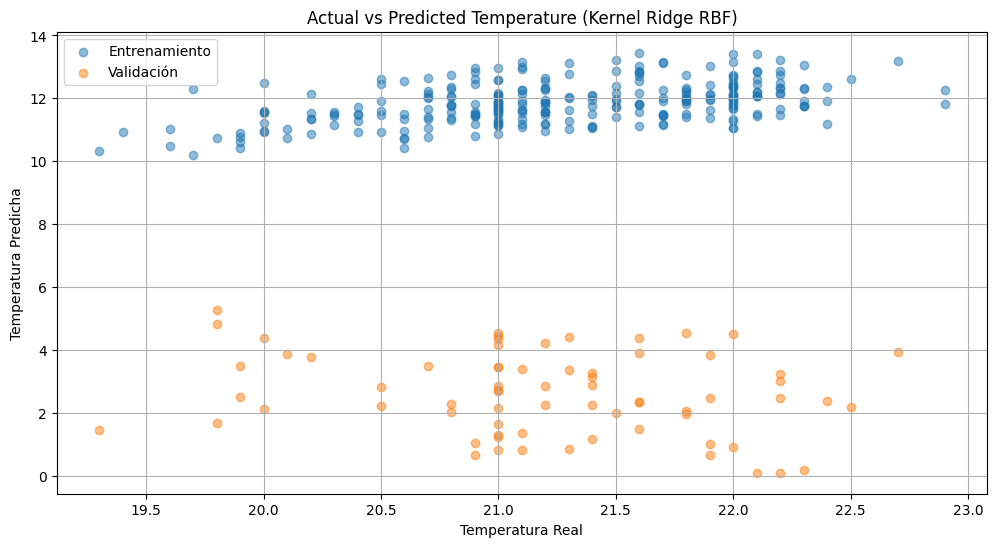

MSE Entrenamiento: 88.969
MSE Validación: 347.980
R^2 Entrenamiento: -179.871
R^2 Validación: -645.849


In [4]:
rbf_model = KernelRidge(kernel='rbf', gamma=0.1)
rbf_model.fit(x_train, y_train)
y_train_pred = rbf_model.predict(x_train)
y_val_pred = rbf_model.predict(x_val)
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Entrenamiento')
plt.scatter(y_val, y_val_pred, alpha=0.5, label='Validación')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.title('Actual vs Predicted Temperature (Kernel Ridge RBF)')
plt.legend()
plt.grid(True)
plt.show()
print(f'MSE Entrenamiento: {mean_squared_error(y_train, y_train_pred):.3f}')
print(f'MSE Validación: {mean_squared_error(y_val, y_val_pred):.3f}')
print(f'R^2 Entrenamiento: {r2_score(y_train, y_train_pred):.3f}')
print(f'R^2 Validación: {r2_score(y_val, y_val_pred):.3f}')